In [1085]:
import pandas as pd
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1087]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [1088]:
df["App"].drop_duplicates()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
10836,Sya9a Maroc - FR
10837,Fr. Mike Schmitz Audio Teachings
10838,Parkinson Exercices FR
10839,The SCP Foundation DB fr nn5n


In [1089]:
df.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


### Fix Rating column

In [1090]:
import numpy as np
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

df.loc[(df["Rating"] < 0) | (df["Rating"] > 5), "Rating"] = np.nan

df["Rating"] = df.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.median()))

fixing size

In [1091]:
df["Size"].head()

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M


In [1092]:
df["Size"].str.contains("Varies with device").sum()

np.int64(1695)

In [1093]:
K=0
M=0
G=0
def convert_size(size):
    global M,K,G
    if pd.isna(size) or size == "Varies with device":
        return np.nan
    size = str(size).upper().strip()
    if "M" in size:
        M+=1
        return float(size.replace("M", ""))
    elif "K" in size:
        K+=1
        return float(size.replace("K", "")) / 1024
    elif "G" in size:
        G+=1
        return float(size.replace("G", "")) * 1024
df["Size"] = df["Size"].apply(convert_size)
print(f"Kilobytes Deleted {K}\nMegabytes Deleted {M}\nGiga bytes Deleted {G}")
df["Size"] = df.groupby("Category")["Size"].transform(lambda x: x.fillna(x.median()))

Kilobytes Deleted 316
Megabytes Deleted 8829
Giga bytes Deleted 0


fixing price

In [1094]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [1095]:
df[df["Price"]=="Everyone"]["Type"]

,Type
10472,0


In [1096]:
df.loc[df["Price"]=="Everyone","Type"]="Free"

df.loc[df["Price"]=="Everyone","Price"]= 0

In [1097]:
df[df["Price"]=="Everyone"]["Type"]

,Type


In [1098]:
df["Type"].fillna("Free", inplace=True)

/tmp/ipython-input-635867199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type"].fillna("Free", inplace=True)


In [1099]:

df["Price"]=df["Price"].str.replace("$","")
df["Price"]=df["Price"].astype(float)

category fixing

In [1100]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [1101]:
df=df[df["Category"]!='1.9']
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [1102]:
import pandas as pd
import numpy as np

def cleaning_android_version(v):
    if pd.isna(v) or "Varies" in str(v):
        return np.nan
    v = str(v).split(" ")[0]
    return v.replace("W", "")

df["Android Ver"] = df["Android Ver"].apply(cleaning_android_version)
print("Missing Android Versions before fill:", df["Android Ver"].isna().sum())

modes_per_category = df.groupby('Category')['Android Ver'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print("\nMode used for each Category:")
print(modes_per_category)


df['Android Ver'] = df.groupby('Category')['Android Ver'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

print("\nMissing Android Versions after fill:", df["Android Ver"].isna().sum())
print("\nUnique Android Versions after fill:")
print(df["Android Ver"].unique())


Missing Android Versions before fill: 1364

Mode used for each Category:
Category
ART_AND_DESIGN           4.1
AUTO_AND_VEHICLES        4.0
BEAUTY                 4.0.3
BOOKS_AND_REFERENCE      4.0
BUSINESS                 4.1
COMICS                 4.0.3
COMMUNICATION            4.1
DATING                 4.0.3
EDUCATION                4.1
ENTERTAINMENT            4.4
EVENTS                   4.1
FAMILY                   4.1
FINANCE                  4.1
FOOD_AND_DRINK           4.1
GAME                     4.1
HEALTH_AND_FITNESS       4.1
HOUSE_AND_HOME         4.0.3
LIBRARIES_AND_DEMO       1.6
LIFESTYLE                4.1
MAPS_AND_NAVIGATION      4.1
MEDICAL                4.0.3
NEWS_AND_MAGAZINES       4.1
PARENTING              4.0.3
PERSONALIZATION          4.1
PHOTOGRAPHY              4.0
PRODUCTIVITY             4.1
SHOPPING                 4.1
SOCIAL                   4.1
SPORTS                   4.1
TOOLS                    4.1
TRAVEL_AND_LOCAL         4.1
VIDEO_PLAYERS      

current ver

In [1103]:

def cleaning_current_version(v):
    if pd.isna(v) or "Varies" in str(v):
        return np.nan
    v = str(v).split(" ")[0]
    return v


df["Current Ver"] = df["Current Ver"].apply(cleaning_current_version)
print("Missing Current Versions before fill:", df["Current Ver"].isna().sum())


modes_per_category = df.groupby('Category')['Current Ver'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print("\nMode used for each Category:")
print(modes_per_category)


df['Current Ver'] = df.groupby('Category')['Current Ver'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

print("\nMissing Current Versions after fill:", df["Current Ver"].isna().sum())
print("\nUnique Current Versions after cleaning:")
print(df["Current Ver"].unique())


Missing Current Versions before fill: 1467

Mode used for each Category:
Category
ART_AND_DESIGN             1.0
AUTO_AND_VEHICLES          1.0
BEAUTY                     1.0
BOOKS_AND_REFERENCE        1.0
BUSINESS                   1.0
COMICS                     1.0
COMMUNICATION              1.0
DATING                     1.0
EDUCATION               20.7.2
ENTERTAINMENT          11.45.0
EVENTS                     1.0
FAMILY                     1.0
FINANCE                    1.0
FOOD_AND_DRINK             1.0
GAME                       1.0
HEALTH_AND_FITNESS       4.2.2
HOUSE_AND_HOME             1.0
LIBRARIES_AND_DEMO       2.3.2
LIFESTYLE                  1.0
MAPS_AND_NAVIGATION        1.3
MEDICAL                    1.0
NEWS_AND_MAGAZINES         1.0
PARENTING                  1.2
PERSONALIZATION            1.0
PHOTOGRAPHY                1.0
PRODUCTIVITY               1.0
SHOPPING                   1.0
SOCIAL                     1.0
SPORTS                     1.0
TOOLS              

Genre


In [1104]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [1105]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [1106]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

last updated

In [1107]:

df["Last Updated"]=pd.to_datetime(df["Last Updated"],errors='coerce')

In [1108]:
df["Last Updated"].head(5)

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


Content Rating

In [1109]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [1110]:
df["Content Rating"]=df["Content Rating"].str.split(" ").str[0]

In [1111]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature', 'Adults', 'Unrated'], dtype=object)

installs and review

In [1112]:
df["Reviews"] = df["Reviews"].astype(int)
df["Installs"] = (
    df["Installs"]
    .str.replace("[+,]", "", regex=True)
    .astype(int)
)
df["Installs"].fillna(df["Installs"].median(), inplace=True)
df["Reviews"].fillna(df["Reviews"].median(), inplace=True)

/tmp/ipython-input-1361559942.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Installs"].fillna(df["Installs"].median(), inplace=True)
/tmp/ipython-input-1361559942.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [1113]:
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


handling outliers

col Reviews ,lower 0.00, upper 136881.75


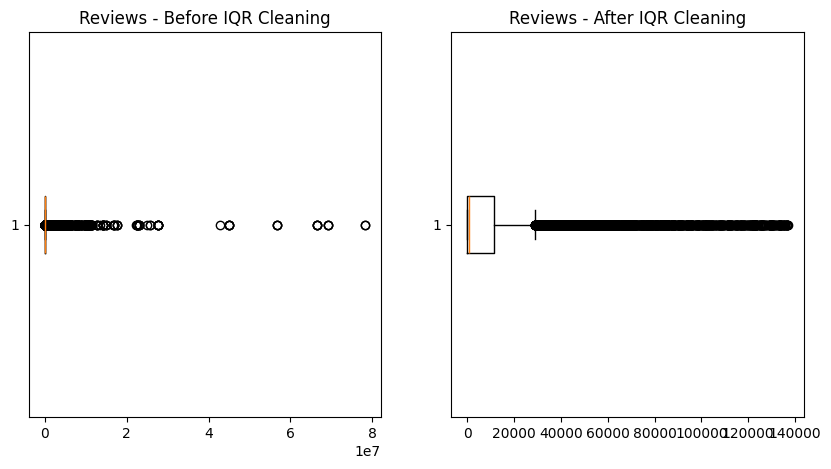

col Installs ,lower 0.00, upper 2498500.00


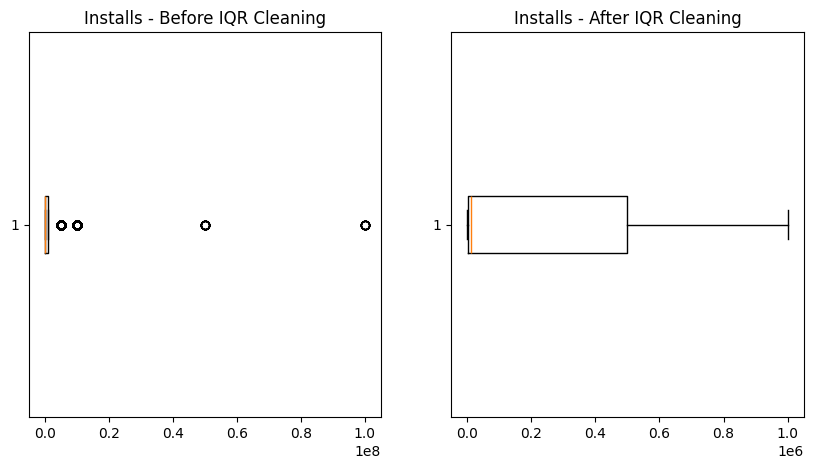

In [1114]:
import matplotlib.pyplot as plt

num_cols = ["Reviews", "Installs"]

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].boxplot(df[col], vert=False)
    axes[0].set_title(f"{col} - Before IQR Cleaning")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    print(f"col {col} ,lower {lower_bound:.2f}, upper {upper_bound:.2f}")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    axes[1].boxplot(df[col], vert=False)
    axes[1].set_title(f"{col} - After IQR Cleaning")
    plt.show()


What is the most expensive app on the Play Store?


Most Expensive App:
                                     App   Price
4367           I'm Rich - Trump Edition  400.00
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99
5351                          I am rich  399.99
5354                     I am Rich Plus  399.99
5356                  I Am Rich Premium  399.99 

Top 5 Most Expensive Perfectly Rated Apps:

                                    App   Category  Rating   Price
4367           I'm Rich - Trump Edition  LIFESTYLE     3.6  400.00
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE     4.2  399.99
5351                          I am rich  LIFESTYLE     3.8  399.99
5354                     I am Rich Plus     FAMILY     4.0  399.99
5356                  I Am Rich Premium    FINANCE     4.1  399.99


/tmp/ipython-input-2045309368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive, x="App", y="Price", palette="crest")
/tmp/ipython-input-2045309368.py:10: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2045309368.py:10: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2045309368.py:10: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2045309368.py:10: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIF

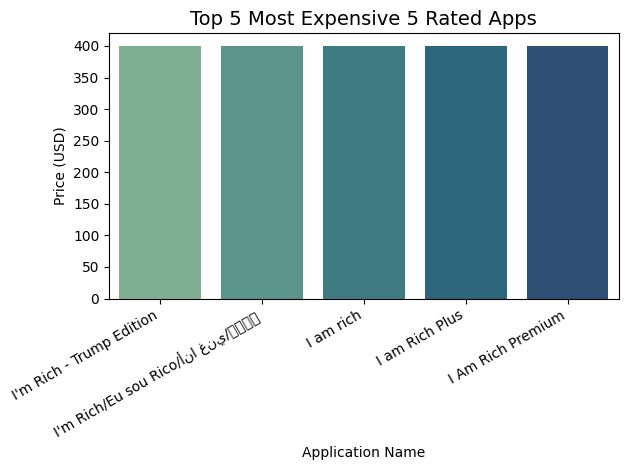

In [1115]:

most_expensive = df.sort_values(by="Price", ascending=False).head(5)
print("Most Expensive App:\n", most_expensive[["App","Price"]], "\n")
print("Top 5 Most Expensive Perfectly Rated Apps:\n")
print(most_expensive[["App", "Category", "Rating", "Price"]])
sns.barplot(data=most_expensive, x="App", y="Price", palette="crest")
plt.title("Top 5 Most Expensive 5 Rated Apps", fontsize=14)
plt.ylabel("Price (USD)")
plt.xlabel("Application Name")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

Which genre has the highest number of apps?

/tmp/ipython-input-576851314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="viridis")


Genre Counts:
 Genres
Tools                      655
Education                  567
Entertainment              518
Medical                    460
Business                   408
Lifestyle                  339
Finance                    316
Personalization            313
Productivity               284
Sports                     267
Health & Fitness           255
News & Magazines           224
Communication              219
Dating                     206
Books & Reference          193
Action                     179
Social                     174
Travel & Local             168
Photography                163
Simulation                 155
Shopping                   144
Casual                     144
Arcade                     116
Video Players & Editors    113
Maps & Navigation          103
Puzzle                      99
Food & Drink                97
Educational                 90
Role Playing                81
Libraries & Demo            79
Auto & Vehicles             79
House & Home     

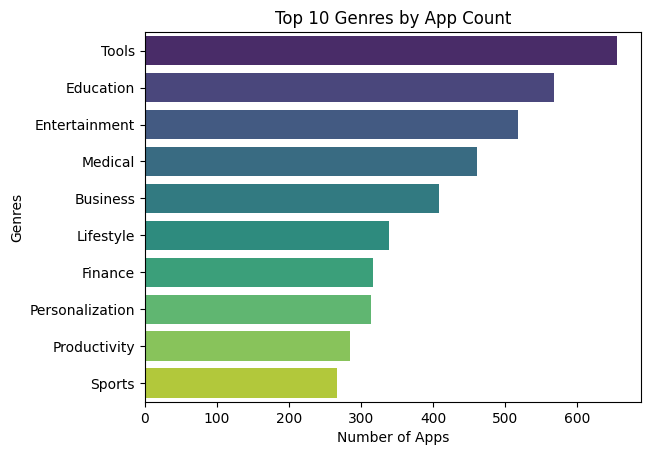

In [1116]:

genre_counts = df.groupby("Genres")["App"].count().sort_values(ascending=False)
print("Genre Counts:\n", genre_counts, "\n")

sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="viridis")
plt.title("Top 10 Genres by App Count")
plt.xlabel("Number of Apps")
plt.show()


What is the average size of free vs. paid apps?

Average Size (MB):
 Type
Free    17.707877
Paid    18.590722
Name: Size, dtype: float64 



/tmp/ipython-input-4130921621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette="mako")


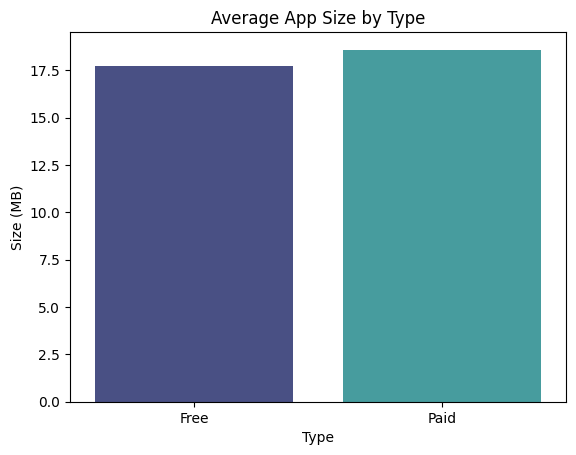

In [1117]:
avg_size = df.groupby("Type")["Size"].mean()
print("Average Size (MB):\n", avg_size, "\n")

sns.barplot(x=avg_size.index, y=avg_size.values, palette="mako")
plt.title("Average App Size by Type")
plt.ylabel("Size (MB)")
plt.show()

What are the top 5 most expensive apps with a perfect rating (5)?

Top 5 Most Expensive Perfectly Rated Apps:

                                            App Category  Rating  Price
5489                  AP Art History Flashcards   FAMILY     5.0  29.99
7477                 USMLE Step 2 CK Flashcards   FAMILY     5.0  19.99
5482                 meStudying: AP English Lit   FAMILY     5.0   4.99
5246                      Hey AJ! It's Bedtime!   FAMILY     5.0   4.99
7204  TI-84 CE Graphing Calculator Manual TI 84   FAMILY     5.0   4.99


/tmp/ipython-input-3640312051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x="App", y="Price", palette="crest")


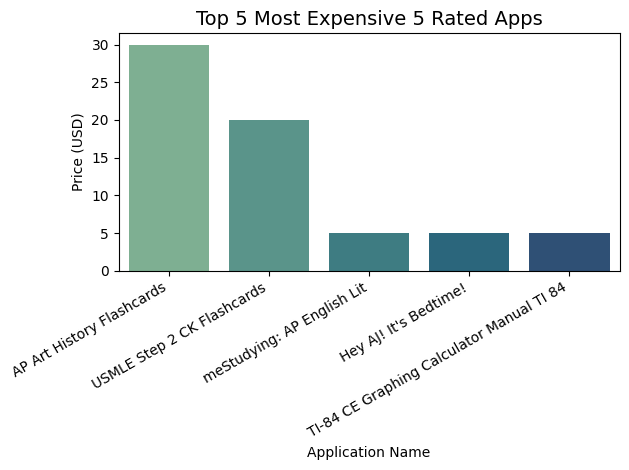

In [1118]:

top5 = df[df["Rating"] == 5.0].sort_values("Price", ascending=False).head(5)

print("Top 5 Most Expensive Perfectly Rated Apps:\n")
print(top5[["App", "Category", "Rating", "Price"]])
sns.barplot(data=top5, x="App", y="Price", palette="crest")
plt.title("Top 5 Most Expensive 5 Rated Apps", fontsize=14)
plt.ylabel("Price (USD)")
plt.xlabel("Application Name")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


How many apps have received more than 50K reviews?

In [1119]:
df["Reviews"].dtype

dtype('int64')

In [1120]:
df["Reviews"].describe()

,Reviews
count,7975.000000
mean,6980.833229
std,16431.455040
min,0.000000
25%,12.000000
50%,244.000000
75%,4569.000000
max,136540.000000


Number of apps with >50K reviews: 276



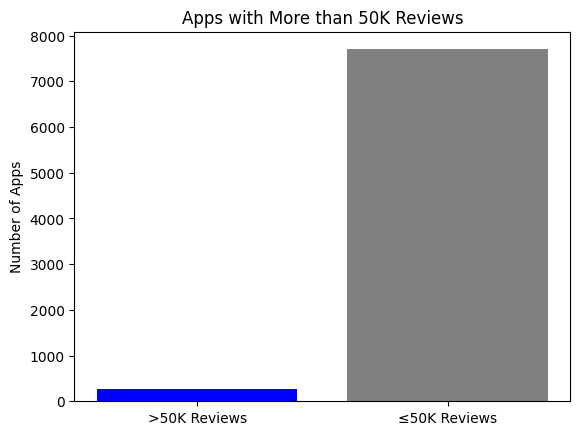

In [1121]:
apps = df[df["Reviews"] > 50000]
print(f"Number of apps with >50K reviews: {len(apps)}\n")

high_review_count = len(apps)
low_review_count = len(df) - high_review_count

plt.bar(['>50K Reviews', '≤50K Reviews'], [high_review_count, low_review_count], color=['blue', 'gray'])
plt.title('Apps with More than 50K Reviews')
plt.ylabel('Number of Apps')
plt.show()


What is the average price of apps, grouped by genre and number of installs?

In [1122]:
df["Price"].dtype

dtype('float64')

/tmp/ipython-input-2285581965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(["Genres","Installs_Bin"])["Price"].mean().reset_index()


Average Price by Genre and Install Range:
      Genres Installs_Bin     Price
0    Action          <1k  0.565455
1    Action       1k-10k  1.678636
2    Action     10k-100k  0.391786
3    Action      100k-1M  0.163797
4    Action        1M-5M       NaN
..      ...          ...       ...
283    Word       1k-10k  0.000000
284    Word     10k-100k  0.000000
285    Word      100k-1M  0.000000
286    Word        1M-5M       NaN
287    Word          5M+       NaN

[288 rows x 3 columns] 



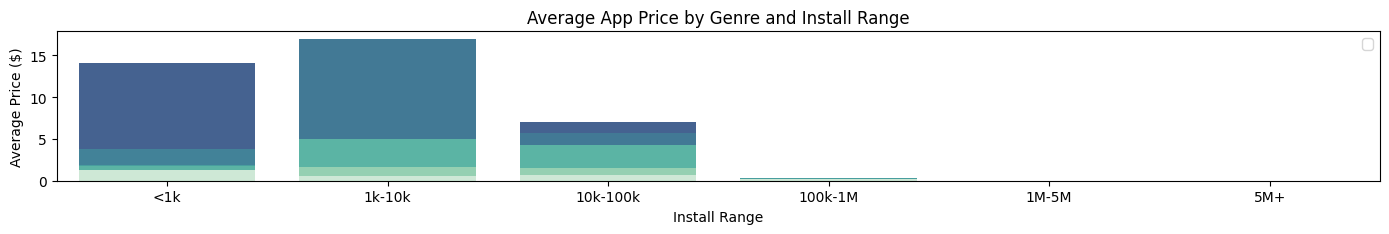

In [1123]:
df["Installs_Bin"] = pd.cut(df["Installs"], bins=[0,1e3,1e4,1e5,1e6,5e6,1e9],
                            labels=["<1k","1k-10k","10k-100k","100k-1M","1M-5M","5M+"])
avg_price = df.groupby(["Genres","Installs_Bin"])["Price"].mean().reset_index()

print("Average Price by Genre and Install Range:\n", avg_price, "\n")

plt.figure(figsize=(14, 7))
sns.barplot(
    data=avg_price,
    x="Installs_Bin",
    y="Price",
    hue="Genres",
    dodge=False,
    palette="mako"
)

plt.title("Average App Price by Genre and Install Range")
plt.xlabel("Install Range")
plt.ylabel("Average Price ($)")
plt.legend(title="Genre")
plt.tight_layout()
plt.legend([], [])
plt.show()

How many apps have a rating higher than 4.7, and what is their average price?

Apps with rating > 4.7: 558


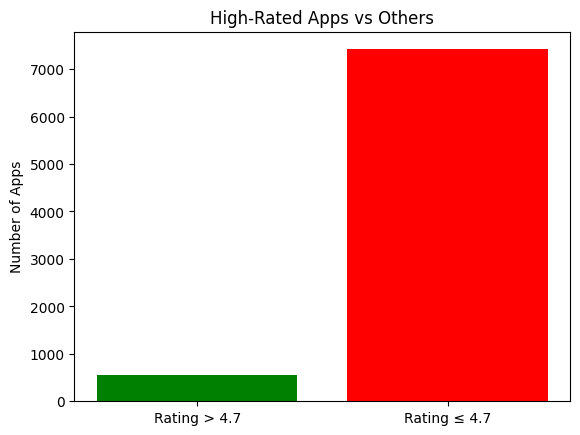

In [1124]:
high_rated = df[df["Rating"] > 4.7]
print(f"Apps with rating > 4.7: {len(high_rated)}")


high_count = len(high_rated)
low_count = len(df) - high_count
plt.bar(['Rating > 4.7', 'Rating ≤ 4.7'], [high_count, low_count], color=['green', 'red'])
plt.title('High-Rated Apps vs Others')
plt.ylabel('Number of Apps')
plt.show()


What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)

In [1125]:
h = df[df["Installs"] >= 5_000_000]
h["Revenue"] = h["Price"] * h["Installs"] * 0.30
revenue = h["Revenue"].sum()
print(f"Estimated Google Revenue (5M+ installs): ${revenue}\n")



Estimated Google Revenue (5M+ installs): $0.0



What are the maximum and minimum sizes of free vs. paid apps?

min and max of free vs paid sizes:
            min    max
Type                 
Free  0.008301  100.0
Paid  0.013672  100.0 



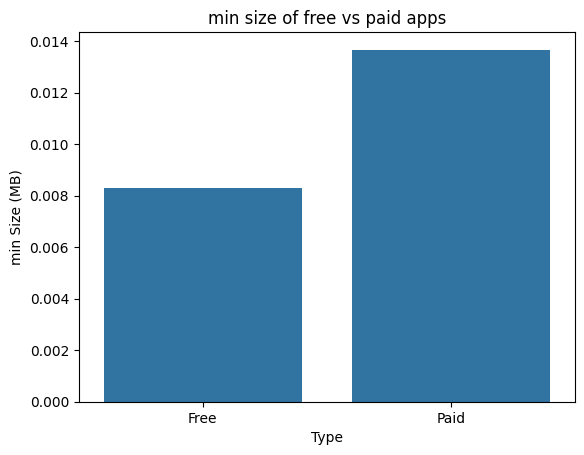

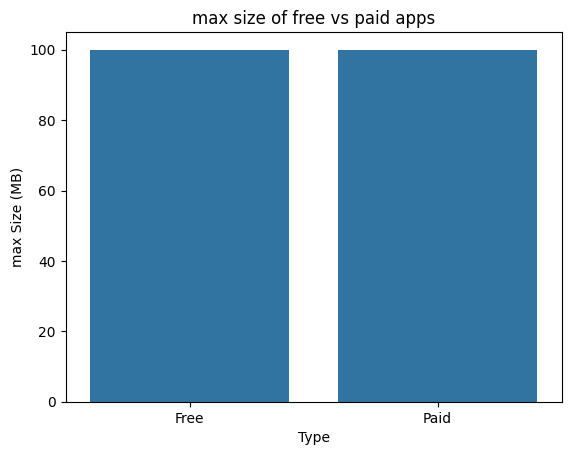

In [1126]:
size_stats = df.groupby("Type")["Size"].agg(["min","max"])
print("min and max of free vs paid sizes:\n", size_stats, "\n")
sns.barplot(size_stats,x=size_stats.index,y=size_stats["min"])
plt.title("min size of free vs paid apps")
plt.xlabel("Type")
plt.ylabel("min Size (MB)")
plt.show()
sns.barplot(size_stats,x=size_stats.index,y=size_stats["max"])
plt.title("max size of free vs paid apps")
plt.xlabel("Type")
plt.ylabel("max Size (MB)")
plt.show()

Is there a correlation between an app’s rating, number of reviews, size, and its price?

Correlation Matrix:
            Rating   Reviews      Size     Price
Rating   1.000000  0.119462  0.013521 -0.014995
Reviews  0.119462  1.000000  0.172325 -0.025153
Size     0.013521  0.172325  1.000000 -0.015429
Price   -0.014995 -0.025153 -0.015429  1.000000 



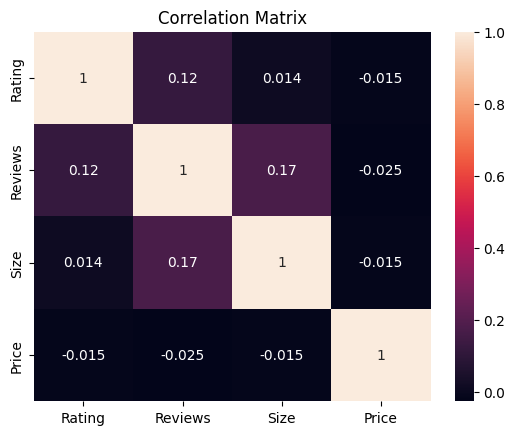

In [1127]:
corr = df[["Rating","Reviews","Size","Price"]].corr()
print("Correlation Matrix:\n", corr, "\n")

sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


How many apps exist for each type (free/paid) across different content ratings?

Apps per Type and Content Rating:
 Type              Free   Paid
Content Rating               
Adults             3.0    NaN
Everyone        6157.0  724.0
Mature           329.0   18.0
Teen             690.0   52.0
Unrated            2.0    NaN 



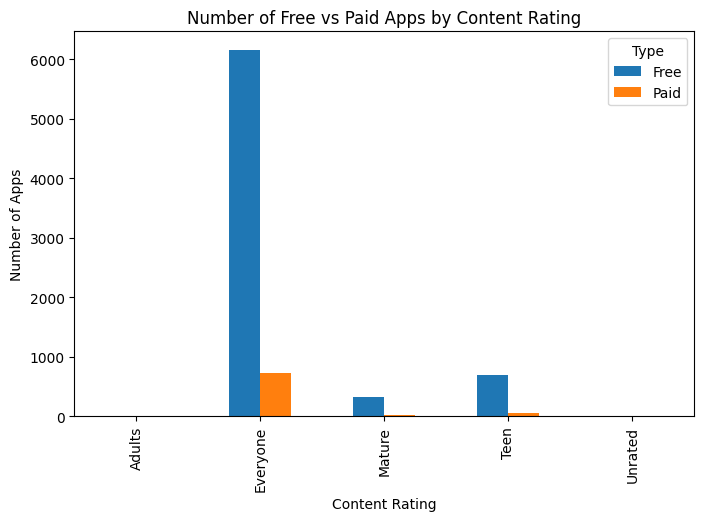

In [1128]:
ratings=df.groupby(["Content Rating","Type"])["App"].count().unstack()
print("Apps per Type and Content Rating:\n", ratings, "\n")
ratings.plot(kind="bar", figsize=(8, 5))
plt.title("Number of Free vs Paid Apps by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.legend(title="Type")
plt.show()


How many apps are compatible with Android version 4.x?

In [1129]:
df["Android Ver"].dtype

dtype('O')

In [1131]:

df["Android Ver Num"] = pd.to_numeric(df["Android Ver"], errors='coerce')

android4x = df[(df["Android Ver Num"] >= 4.0) & (df["Android Ver Num"] < 5.0)]
print(f"Apps compatible with Android 4.x: {len(android4x)}")



Apps compatible with Android 4.x: 4613


/tmp/ipython-input-1220684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_counts.index, y=version_counts.values, palette="mako")


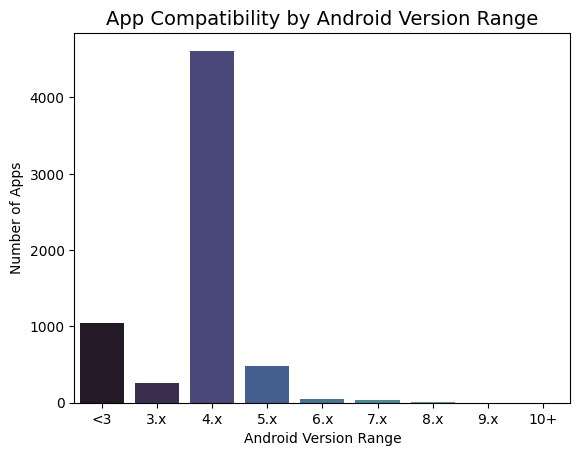

In [1133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df["Android Ver Num"] = pd.to_numeric(df["Android Ver"], errors='coerce')

bins = [1, 3, 4, 5, 6, 7, 8, 9, 10, 15]
labels = ["<3", "3.x", "4.x", "5.x", "6.x", "7.x", "8.x", "9.x", "10+"]

df["Android_Version_Range"] = pd.cut(df["Android Ver Num"], bins=bins, labels=labels, right=False)

version_counts = df["Android_Version_Range"].value_counts().sort_index()

sns.barplot(x=version_counts.index, y=version_counts.values, palette="mako")
plt.title("App Compatibility by Android Version Range", fontsize=14)
plt.xlabel("Android Version Range")
plt.ylabel("Number of Apps")
plt.show()
